<a href="https://colab.research.google.com/github/ashritakodali/project_voting/blob/main/FINAL_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/ashritakodali/project_voting/

Cloning into 'project_voting'...
remote: Enumerating objects: 192, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 192 (delta 9), reused 5 (delta 5), pack-reused 172
Receiving objects: 100% (192/192), 65.80 MiB | 10.92 MiB/s, done.
Resolving deltas: 100% (87/87), done.
Updating files: 100% (93/93), done.


In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
# importing data and combining it with total votes
df1 = pd.read_csv("/content/project_voting/data/voting_VA.csv")
df2 = pd.read_csv("/content/project_voting/data/df_melt.csv")

df1 = df1[df1["year"] == 2020]
df1_dem = df1.loc[(df1["party"]== "DEMOCRAT")]
df1_rep = df1.loc[(df1["party"]== "REPUBLICAN")]
df2 = df2[df2["YEAR"] == 195]

df1_counts_dem = df1_dem.groupby(["county_fips"])["candidatevotes"].sum()
df1_counts_rep = df1_rep.groupby(["county_fips"])["candidatevotes"].sum()

total_votes = df1_counts_rep - df1_counts_dem
# negative total votes means democrats won, positive mean republicans won in that
# county

total_votes_df = pd.DataFrame(total_votes).reset_index()

total_votes_df.rename(columns = {'county_fips':'FIPS', "candidatevotes":"total_votes"}, inplace = True)

merged_df = pd.merge(total_votes_df, df2, on="FIPS", how="inner")

# looking at the text files for the data, I will select the following variables
# because I think they might have the best chance at a relationship with
# total votes based on prior knowledge and research
  ## persons by sex: AV1
    ### AV1AA - male
    ### AV1AB - female
  ## persons 25 years or older education: B69
    ### B69AA - less than 9th grade - people - number of people in poverty
    ### B69AB - 9th grade - 3 years of college - number of people in poverty
    ### B69AC - bachelor's degree or greater - number of people in poverty
  ## houshold by incomes: B79
    ### B79AA - median income
  ## poverty status: AX6
    ### AX6AA - number of people in poverty

df = merged_df[["total_votes", "AV1AA", "AV1AB", "B69AA", "B69AB", "B69AC",
                "B79AA", "AX6AA", "FIPS"]]
df["votes"] = np.arcsinh(df["total_votes"])
df.describe()
# it appears that all of the columns have 133 observations (no NA's for us to process)

# since the data is cleaned, it is ready to go.

<ipython-input-112-303a4c4a32ca>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["votes"] = np.arcsinh(df["total_votes"])


,total_votes,AV1AA,AV1AB,B69AA,B69AB,B69AC,B79AA,AX6AA,FIPS,votes
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,1.330000e+02,133.000000,133.000000
mean,-3392.015038,31271.977444,32295.413534,1776.631579,24813.789474,16844.812030,60756.736842,6.166623e+04,51263.992481,2.534647
std,27040.291611,62292.340756,63795.377732,3415.665279,36765.823362,48227.612473,22067.972768,1.243992e+05,271.883038,8.698192
min,-251542.000000,1062.000000,1142.000000,28.000000,1356.000000,422.000000,27063.000000,2.179000e+03,51001.000000,-13.128512
25%,-1286.000000,7256.000000,7260.000000,501.000000,7069.000000,1970.000000,46073.000000,1.405300e+04,51069.000000,-7.852439
50%,1233.000000,12530.000000,13491.000000,889.000000,12383.000000,4218.000000,55708.000000,2.500800e+04,51139.000000,7.810353
75%,5010.000000,26584.000000,27725.000000,1811.000000,26107.000000,9095.000000,71110.000000,5.216600e+04,51550.000000,9.212338
max,23424.000000,568173.000000,577689.000000,32538.000000,267360.000000,480163.000000,142299.000000,1.135370e+06,51840.000000,10.754664


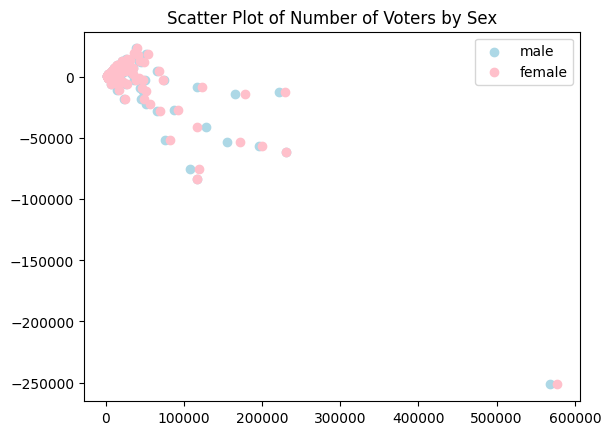

In [113]:
# exploratory data analysis: sex variable
Y = df["total_votes"]
X1 = df["AV1AA"]
X2 = df["AV1AB"]
plt.scatter(X1, Y, color='lightblue')
plt.scatter(X2, Y, color='pink')
plt.title('Scatter Plot of Number of Voters by Sex')
plt.legend(["male", "female"],
           loc="upper right")
plt.show()

# it appears that women vote more in counties that were democratic

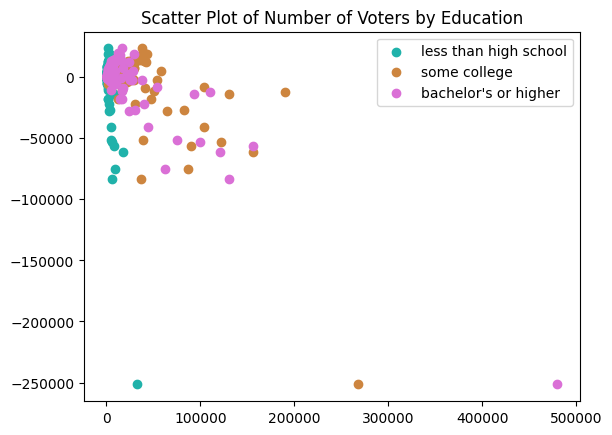

In [114]:
Y = df["total_votes"]
X1 = df["B69AA"]
X2 = df["B69AB"]
X3 = df["B69AC"]
plt.scatter(X1, Y, color= 'lightseagreen')
plt.scatter(X2, Y, color= 'peru')
plt.scatter(X3, Y, color = 'orchid')
plt.legend(["less than high school", "some college", "bachelor's or higher"],
           loc="upper right")
plt.title("Scatter Plot of Number of Voters by Education")
plt.show()

# there are more voters who voted for democrats that had higher educations

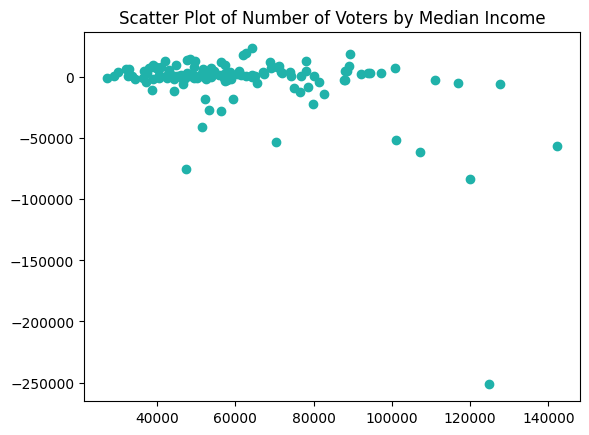

In [115]:
Y = df["total_votes"]
X1 = df["B79AA"]
plt.scatter(X1, Y, color= 'lightseagreen')
plt.title("Scatter Plot of Number of Voters by Median Income")
plt.show()

# it appears that individuals are more likely to vote for democrats if
# their income is larger

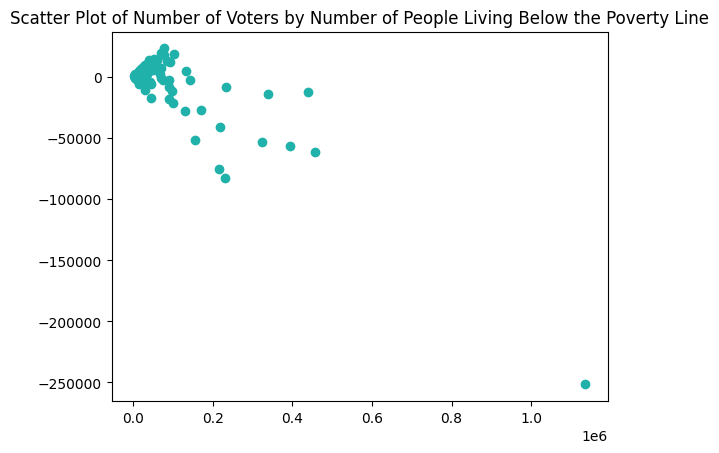

In [116]:
Y = df["total_votes"]
X1 = df["AX6AA"]
plt.scatter(X1, Y, color= 'lightseagreen')
plt.title("Scatter Plot of Number of Voters by Number of People Living Below the Poverty Line")
plt.show()

# multiply numbers by 10^6 for the x-axis (that is the number of people)

<Axes: >

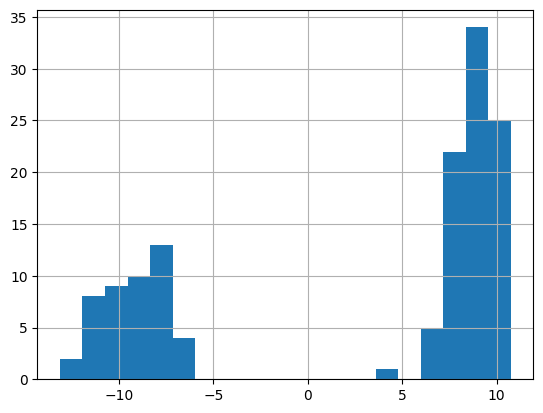

In [117]:
# linear regression model: eda

df['votes'].hist(bins=20)

# it appears that the inverse sine transformation helped wiht the outliers initially
# because now everything is centered near positive or negative numbers

<Axes: >

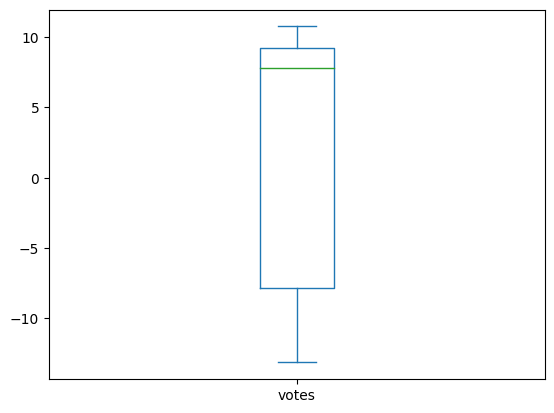

In [118]:
# linear regression model: eda

df["votes"].plot.box()

# it appears that there are no outliers so there is no need to remove any
# of the observations:

In [119]:
df.head()

,total_votes,AV1AA,AV1AB,B69AA,B69AB,B69AC,B79AA,AX6AA,FIPS,votes
0,1594,15934.0,16739.0,1559.0,17372.0,4576.0,46073.0,32325.0,51001,8.067149
1,-21662,51363.0,56042.0,2202.0,30520.0,40215.0,79880.0,100293.0,51003,-10.676462
2,3616,7367.0,7790.0,482.0,9058.0,1688.0,47673.0,14830.0,51005,8.886271
3,2979,6580.0,6373.0,623.0,7069.0,1591.0,57946.0,12861.0,51007,8.692490
4,5369,15290.0,16485.0,1201.0,17183.0,4339.0,52888.0,30994.0,51009,9.281544


In [154]:
# linear regression model: building the model

from sklearn.linear_model import LinearRegression
vars = ["AV1AA", "AV1AB", "B69AA", "B69AB", "B69AC", "B79AA"]
X = df.loc[:, vars]
y = df["votes"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state = 100)

reg = LinearRegression().fit(X_train, y_train)
print(reg.intercept_)
print(reg.coef_)
print(reg.score(X_train, y_train))



744.5097180529048
[-4.79661633e-05 -5.58530502e-04  6.75561443e-04  5.02347978e-04
  2.34267396e-04  3.46933640e-05 -1.44805398e-02]
0.5584853632905471


-3705.78729057628


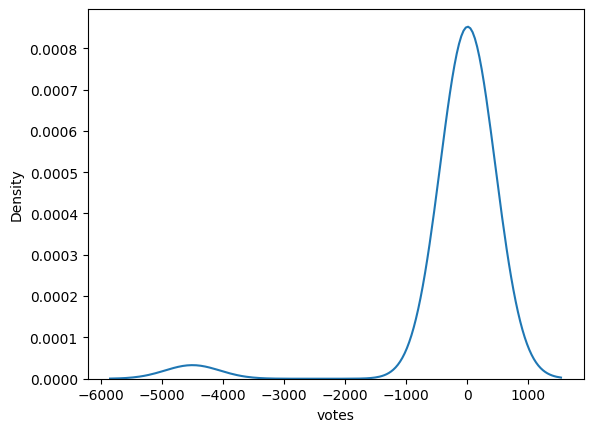

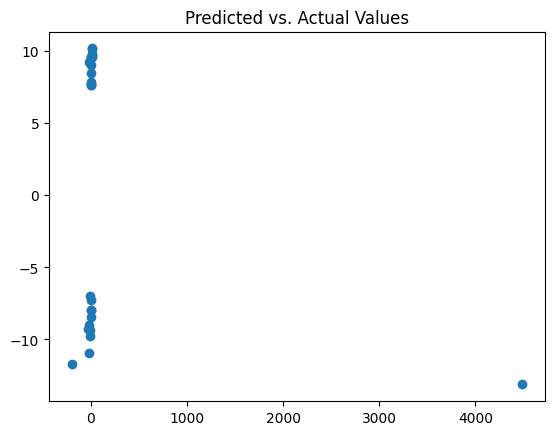

In [155]:
# linear regression model: testing the model

from sklearn.linear_model import LinearRegression # Import linear regression model


N_test = len(X_test['AV1AA'])
TSS = np.sum( (y_test - y_train.mean())**2 )

# Expand features
expander = PolynomialFeatures(degree=2,include_bias=False)
Z_train = expander.fit_transform(X_train)
names = expander.get_feature_names_out()
X_train_lm = pd.DataFrame(data=Z_train, columns = names)
Z_test = expander.fit_transform(X_test)
names = expander.get_feature_names_out()
X_test_lm = pd.DataFrame(data=Z_test, columns = names)

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train)
print(reg.score(X_test_lm, y_test))


## Residual plot:
sns.kdeplot(residuals_lm)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_lm,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Metrics:
SSE_lm = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS

The regression model is:  **FIX THIS**
$\hat{y}$ = 7.06861 - 0.0003376(AV1AA) -0.003296(AV1AB) + 0.000883(B69AA) + 0.0007324(B69AB) + 0.000519(B69AC) - 0.0000473(B79AA) + 0.001412(AX6AA)

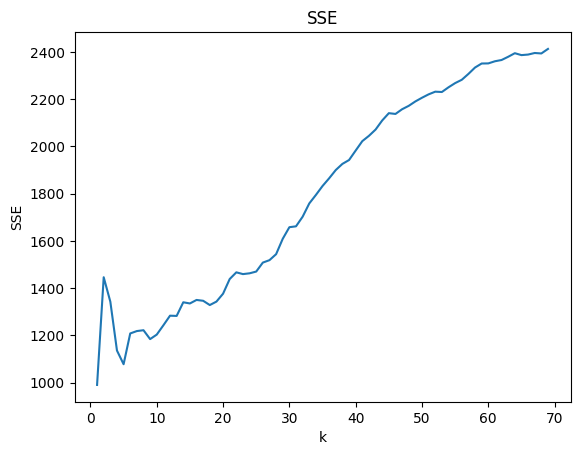

KNeighborsRegressor(n_neighbors=3)


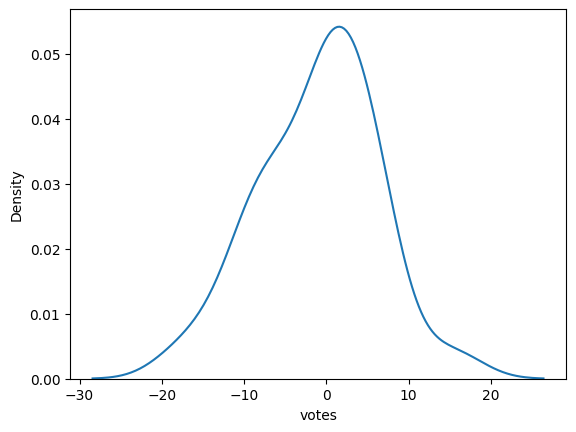

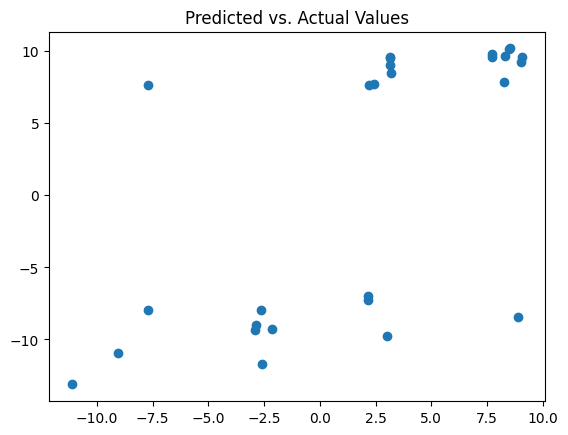

In [156]:
# knn model:
from sklearn.neighbors import KNeighborsRegressor

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X:
X_train_knn = X_train.apply(maxmin)
X_test_knn = X_test.apply(maxmin)

# Determine optimal k:
k_bar = 70
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar-1) # For comparison purposes, store the training error
for k in range(k_bar-1):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train_knn,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test_knn) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index][0] # Find the optimal value of k

## SSE plot:
plt.plot(k_grid,SSE)
plt.xlabel("k")
plt.ylabel("SSE")
plt.title('SSE')
plt.show()

## Fit optimal model:
model = KNeighborsRegressor(n_neighbors=max(3,k_star))
knn_star = model.fit(X_train_knn,y_train)
print(knn_star)
y_hat_knn = knn_star.predict(X_test_knn)
residuals_knn = y_test - y_hat_knn

## Residual plot:
sns.kdeplot(residuals_knn)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_knn,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Metrics:
SSE_knn = np.sum( (y_test-y_hat_knn)**2 )
MSE_knn = SSE_knn/N_test
RMSE_knn = (SSE_knn/N_test)**(1/2)
R2_knn = 1 - SSE_knn/TSS

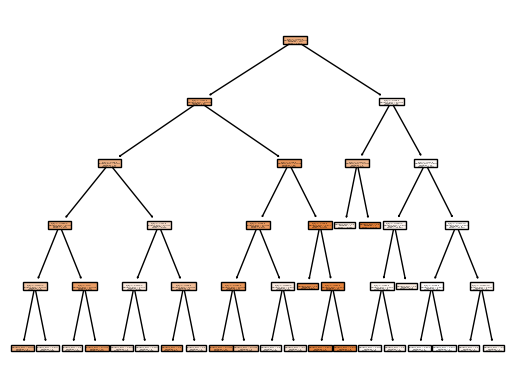

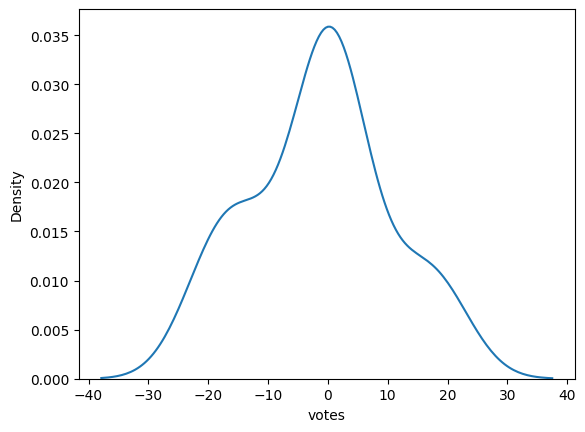

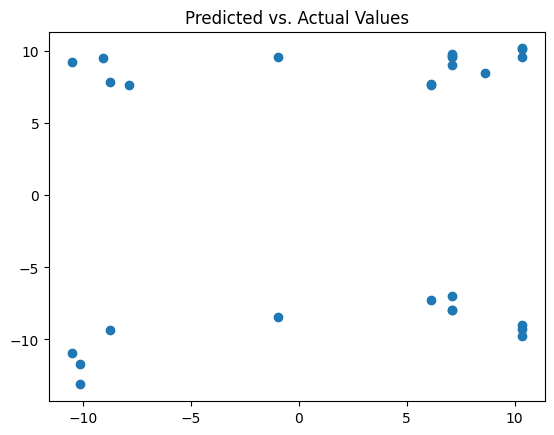

In [149]:
# decision trees
from sklearn import tree

model = tree.DecisionTreeRegressor(max_depth=5) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
residuals_cart = y_test - y_hat_cart

## Residual plot:
sns.kdeplot(residuals_cart)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_cart,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Metrics:
SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS

In [132]:
# Comparison Table:
gdf = pd.DataFrame({'SSE':[SSE_knn,SSE_lm,SSE_cart],
                    'MSE':[MSE_knn,MSE_lm,MSE_cart],
                    'RMSE':[RMSE_knn,RMSE_lm,RMSE_cart],
                    'R2':[R2_knn,R2_lm,R2_cart]})
gdf.index = ['kNN','LM','CART']
gdf.head()

,SSE,MSE,RMSE,R2
kNN,2.188239e+03,81.045876,9.002548,0.093350
LM,2.030485e+07,752031.635495,867.197576,-8411.884487
CART,3.194549e+03,118.316617,10.877344,-0.323593


In [152]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_hat_knn))

ValueError: continuous is not supported

KNeighborsRegressor(n_neighbors=3)


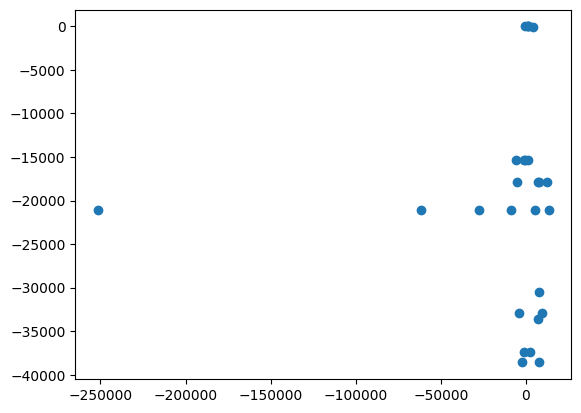

In [161]:
# testing predictions:

# it appears that kNN model is the best, so I will proceed witht that model to
# test its prediction accuracy

df2 = X_test.copy()
df2["y_hat"] = y_hat

X1 = np.sinh(y_test)
Y1 = df2["y_hat"]

plt.scatter(X1, Y1)